In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [3]:
df = pd.read_csv('./iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
attr1 = 'petal.length'
attr2 = 'petal.width'

X = df[[attr1, attr2]]
y = df['variety']

In [5]:
variety = df['variety'].unique()
n_classes = len(variety)

print(variety)
print(f'Broj klasa: {n_classes}')

['Setosa' 'Versicolor' 'Virginica']
Broj klasa: 3


In [6]:
y_mapping = dict(zip(variety, range(n_classes)))
y = y.replace(y_mapping)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: variety, dtype: int64

Text(0.5, 1.0, 'Visual representation of data')

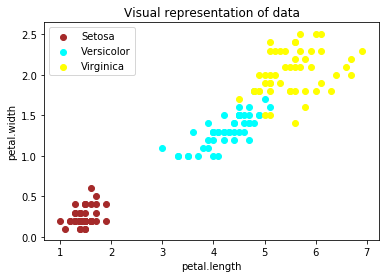

In [17]:
colors = ['brown', 'aqua', 'yellow']

for (c, v) in zip(colors, variety):
    subsamples = df.loc[df['variety'] == v]
    plt.scatter(subsamples[attr1], subsamples[attr2], color=c)

plt.legend(variety)
plt.xlabel(attr1)
plt.ylabel(attr2)
plt.title('Visual representation of data')

In [7]:
clf = RandomForestClassifier(n_estimators=3, max_depth=40)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=7)

In [9]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=40, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
clf.score(X_train, y_train)

0.9904761904761905

In [11]:
clf.score(X_test, y_test)

0.9555555555555556

In [12]:
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

In [13]:
conf_matrix = metrics.confusion_matrix(y_test, y_test_predict)
print(conf_matrix)

[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]


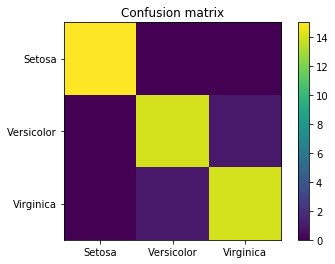

In [14]:
plt.imshow(conf_matrix)
plt.colorbar()
plt.xticks(range(n_classes), variety)
plt.yticks(range(n_classes), variety)

plt.title('Confusion matrix')
plt.show()

In [16]:
print(metrics.classification_report(y_test, y_test_predict))
for (k, v) in y_mapping.items():
    print(f'{k} -> {v}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Setosa -> 0
Versicolor -> 1
Virginica -> 2
